## Name :- C Rangrajan Kumar

In [1]:
# Import Python Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Data
df = pd.read_csv("playstore-analysis.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Check null value in every column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


## Task:1 Data clean up – Missing value treatment

##### a. Drop records where rating is missing since rating is our target/study variable

In [8]:
df.Rating.isnull().sum()

1474

In [9]:
df.Rating.dropna(inplace=True)

In [10]:
df.Rating.isnull().sum()

0

#### b. Check the null values for the Android Ver column.

- i. Are all 3 records having the same problem?

In [11]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- ii.Drop the 3rd record i.e. record for “Life Made WIFI …”

In [12]:
df.drop([10472], inplace = True)

In [13]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


- iii. Replace remaining missing values with the mode

In [14]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace = True)

#### c. Current ver – replace with most common value

In [15]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace = True)

## Task 2 :- Data Clean up - Correcting the data type

#### a.	Which all variables need to be brought to numeric types?
- Ans:- Reviews and installs need to be brought to numeric types.


####  b. Price variable – remove $ sign and convert to ﬂoat

In [16]:
price = []
for i in df.Price:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

In [17]:
df.drop(labels=df[df['Price']=='Everyone'].index, inplace = True)
df['Price']= price
df['Price']= df['Price'].astype('float')

#### c.	Installs – remove ‘,’ and ‘+’ sign, convert to integer


In [18]:
install = []
for j in df.Installs:
    install.append(j.replace(',','').replace('+','').strip())

df['Installs']= install
df['Installs']= df['Installs'].astype('int')

#### d. Convert all other identified columns to numeric

In [19]:
df.Reviews= df.Reviews.astype('int')

In [20]:
type(df.Reviews)

pandas.core.series.Series

## Task 3:- Sanity checks – check for the following and handle accordingly

#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store
- i. Are there any such records? Drop if so.

In [21]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- There are no such records with rating less than 1 or greater than 5.

### b. Reviews should not be more than installs as only those who installed can review the app.
- i. Are there any such records? Drop if so.

In [22]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4,64000.000000,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2,238.000000,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,NaN,11,2000.000000,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,NaN,14,47000.000000,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [23]:
temp = df[df['Reviews']>df['Installs']].index
df.drop(labels=temp, inplace=True)

In [24]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Task 4 :- Identify and handle outliers –
    - a. Price Column
    - a(i) -  Make suitable plot to identify outliers in price

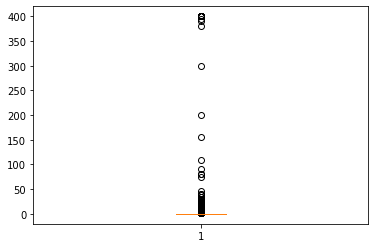

In [25]:
plt.boxplot(df.Price)
plt.show()

- ii. Do you expect apps on the play store to cost $200? Check out these cases

In [26]:
print('Yes we could expect apps on the play store to cost $200')
df.loc[df.Price > 200]

Yes we could expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


- iii. After dropping the useless records, make the suitable plot again to identify outliers


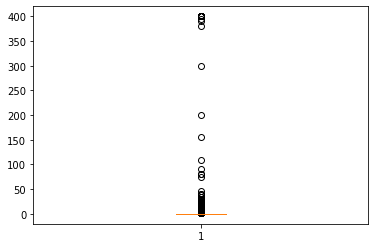

In [27]:
plt.boxplot(df['Price'])
plt.show()

 iv. Limit data to records with price < $30

In [28]:
gt = df[df['Price'] > 30].index
df.drop(labels=gt, inplace=True)

In [29]:
count = df.loc[df.Price > 30].index
count.value_counts().sum()

0

### b. Reviews Column

- i .Make suitable plot

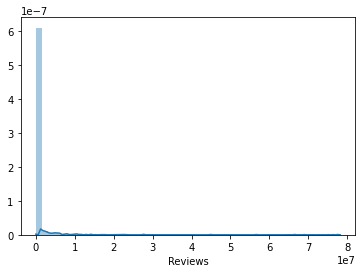

In [30]:
sns.distplot(df['Reviews'])
plt.show()

- ii. Limit data to apps with < 1 Million reviews

In [31]:
gt_1m = df[df['Reviews'] > 1000000 ].index
df.drop(labels = gt_1m, inplace=True)
print(gt_1m.value_counts().sum(),'cols dropped')

704 cols dropped


In [32]:
df['Reviews'] = df[df['Reviews'] < 1000000]

#### c. Installs

- i. What is the 95th percentile of the installs?

In [33]:
percentile_95 = df.Installs.quantile(0.95) #95th Percentile of Installs
print(percentile_95,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


- ii.Drop records having a value more than the 95th percentile

In [34]:
for i in range(0,101,1):
    print(' the {} percentile of installs is {} '.format(i,np.percentile(df['Installs'],i)))

 the 0 percentile of installs is 0.0 
 the 1 percentile of installs is 5.0 
 the 2 percentile of installs is 10.0 
 the 3 percentile of installs is 10.0 
 the 4 percentile of installs is 10.0 
 the 5 percentile of installs is 10.0 
 the 6 percentile of installs is 50.0 
 the 7 percentile of installs is 50.0 
 the 8 percentile of installs is 100.0 
 the 9 percentile of installs is 100.0 
 the 10 percentile of installs is 100.0 
 the 11 percentile of installs is 100.0 
 the 12 percentile of installs is 100.0 
 the 13 percentile of installs is 100.0 
 the 14 percentile of installs is 100.0 
 the 15 percentile of installs is 500.0 
 the 16 percentile of installs is 500.0 
 the 17 percentile of installs is 500.0 
 the 18 percentile of installs is 1000.0 
 the 19 percentile of installs is 1000.0 
 the 20 percentile of installs is 1000.0 
 the 21 percentile of installs is 1000.0 
 the 22 percentile of installs is 1000.0 
 the 23 percentile of installs is 1000.0 
 the 24 percentile of installs

In [35]:
temp1 = df[df["Installs"] > percentile_95].index
df.drop(labels = temp1, inplace = True)
print(temp1.value_counts().sum())#,'cols dropped')

199


## Data analysis to answer business questions

### Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

#### a. How do you explain this?

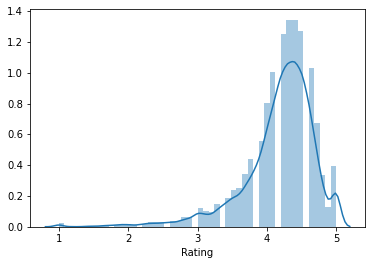

The skewness of this distribution is -1.743427033064799
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [36]:
sns.distplot(df['Rating'])
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))

#### b. What is the implication of this on your analysis?

In [37]:
df['Rating'].mode()

0    4.3
dtype: float64

Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

## 6. What are the top Content Rating values?

#### a. Are there any values with very few records?

In [38]:
df['Content Rating'].value_counts()

Everyone           8062
Teen               1024
Mature 17+          455
Everyone 10+        349
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

- Adults only 18+ and Unrated are values with very few records.

#### b. If yes, drop those as they won’t help in the analysis

In [39]:
#Replacing unwanted values with NaN
dirc = []
for k in df['Content Rating']:
    dirc.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

df['Content Rating']= dirc


In [40]:
# Droping the NaN values.
temp2 = df[df["Content Rating"] == 'NaN'].index
df.drop(labels=temp2, inplace=True)
print('droped cols',temp2)

droped cols Int64Index([298, 3043, 6424, 7312, 8266], dtype='int64')


In [41]:
df['Content Rating'].value_counts() # Just  Check

Everyone        8062
Teen            1024
Mature 17+       455
Everyone 10+     349
Name: Content Rating, dtype: int64

## Task 7. Effect of size on rating

#### a. Make a joinplot to understand the effect of size on rating

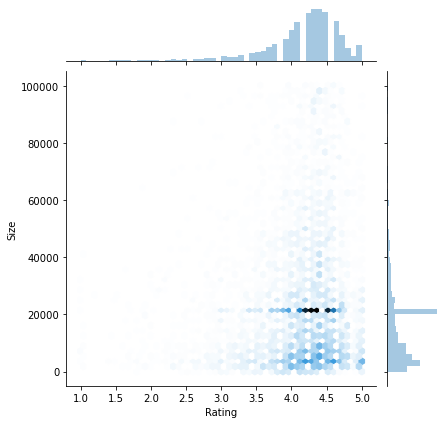

In [42]:
sns.jointplot(y ='Size', x ='Rating', data = df, kind ='hex')
plt.show()

#### b. Do you see any patterns?

- Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

#### c. How do you explain the pattern?

- Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating

## Task 8. Effect of price on rating

#### a. Make a jointplot (with regression line)

C:\Users\rajan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


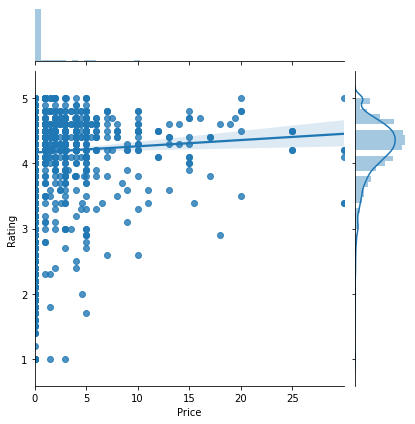

In [43]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

#### b. What pattern do you see?

- Generally on increasing the Price, Rating remains almost constant greater than 4.

#### c. How do you explain the pattern?

- Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [44]:
df.corr()

,Rating,Size,Installs,Price
Rating,1.000000,0.058076,0.118414,0.031479
Size,0.058076,1.000000,0.206755,0.004359
Installs,0.118414,0.206755,1.000000,-0.099462
Price,0.031479,0.004359,-0.099462,1.000000


#### d. Replot the data, this time with only records with price > 0

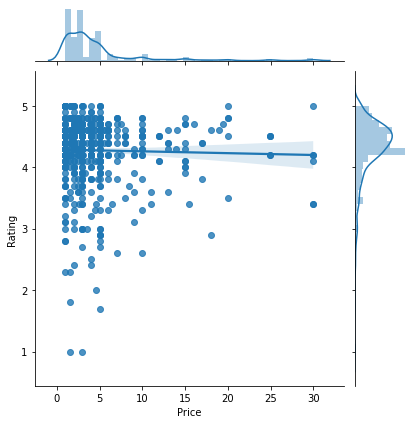

In [45]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

#### e. Does the pattern change?

- Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [46]:
df.corr()

,Rating,Size,Installs,Price
Rating,1.000000,0.058076,0.118414,0.031479
Size,0.058076,1.000000,0.206755,0.004359
Installs,0.118414,0.206755,1.000000,-0.099462
Price,0.031479,0.004359,-0.099462,1.000000


#### f. What is your overall inference on the effect of price on the rating

- Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

## 9. Look at all the numeric interactions together –

#### a.	Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

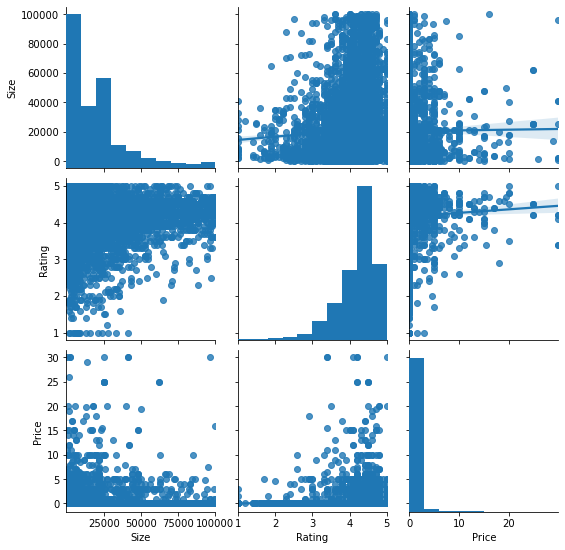

In [47]:
sns.pairplot(df, vars = ['Size','Rating','Price'],kind='reg')

## Task 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating

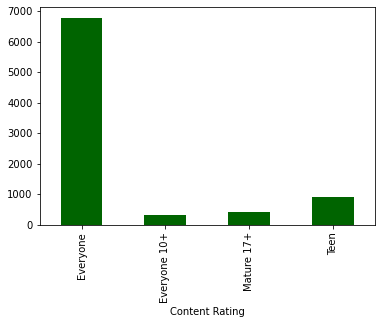

In [48]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")

#### b. Which metric would you use? Mean? Median? Some other quantile?

- We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

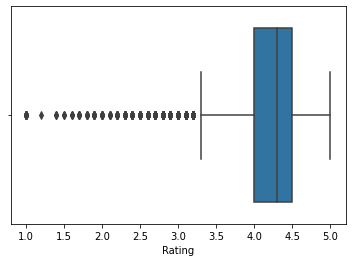

In [49]:
sns.boxplot(df['Rating'])

#### c. Choose the right metric and plot

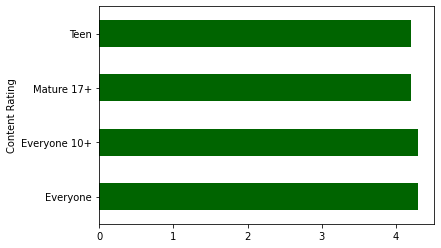

In [50]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")


## Task 11. Content rating vs. size vs. rating – 3 variables at a time

#### a. Create 5 buckets (20% records in each) based on Size

In [57]:
def Bucket_size(x):
    if x>= 0 and x<20000:
        return '0-20k'
    elif x>=20000 and x<40000:
        return '20k-40k'
    elif x>=40000 and x<60000:
        return '40k-60k'
    elif x>=60000 and x<80000:
        return '60k-80k'
    elif x>=80000 and x<100000:
        return '80k-100k'

In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,MED
1,Coloring book moana,ART_AND_DESIGN,3.9,Coloring book moana,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,MED
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,LOW
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Pixel Draw - Number Art Coloring Book,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VERY LOW
5,Paper flowers instructions,ART_AND_DESIGN,4.4,Paper flowers instructions,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,LOW


In [59]:
df['Size Bucket'] = df['Size'].apply(Bucket_size)

In [61]:
df.pivot_table(index= 'Size Bucket', columns = 'Content Rating', values='Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size Bucket,,,,
0-20k,4.144442,4.227778,4.008696,4.182029
20k-40k,4.197800,4.179518,4.155629,4.169329
40k-60k,4.176082,4.270213,4.180851,4.232743
60k-80k,4.249537,4.280769,4.207143,4.282540
80k-100k,4.257233,4.300000,4.252632,4.273846


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [64]:
df1 = df.pivot_table(index= 'Size Bucket', columns = 'Content Rating', values='Rating', aggfunc = lambda x:np.quantile(x,0.2))
df1

Content Rating,Everyone 10+,Mature 17+,Teen
Size Bucket,,,
40k-60k,4.02,NaN,NaN
60k-80k,4.00,NaN,NaN
80k-100k,NaN,4.0,4.08


#### c. Make a heatmap of this

###### i. Annotated

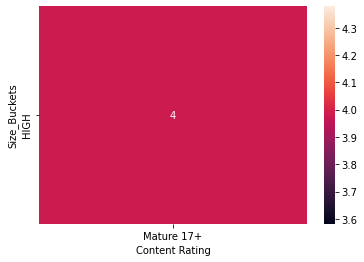

In [66]:
sns.heatmap(Size_Buckets, annot = True)

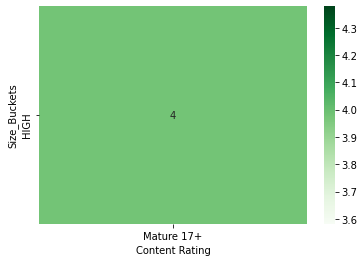

In [67]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')

##### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

- Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.

#                                                   Thank You!